<a href="https://colab.research.google.com/github/roshanbasnet/datascience/blob/master/linear_regression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression - Project Exercise**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

It is the  Ecommerce Customers csv file from the company which has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

*   Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.




In [0]:
#Reading Dataset
df = pd.read_csv('https://raw.githubusercontent.com/trapatsas/Python-Data-Science-and-Machine-Learning-Bootcamp/master/Machine%20Learning%20Sections/Linear-Regression/Ecommerce%20Customers')

In [6]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [8]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


**Using seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

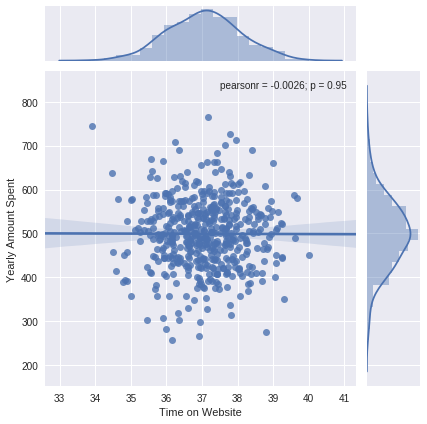

In [13]:
jp = sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df,kind="reg")

**Time on App column **

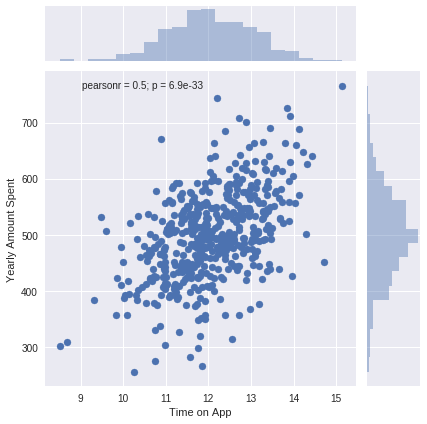

In [16]:
jp = sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df)

**Jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**



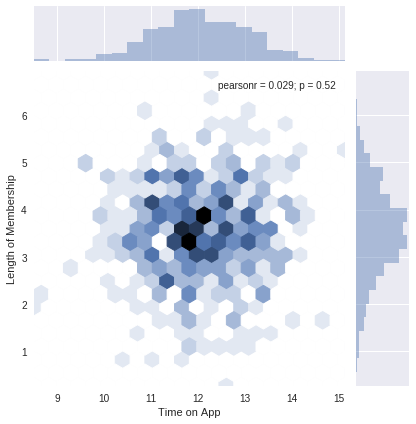

In [19]:
jp = sns.jointplot(x='Time on App',y='Length of Membership',data=df,kind='hex')

**Let's explore these types of relationships across the entire data set. Use pairplot to recreate the plot below.**

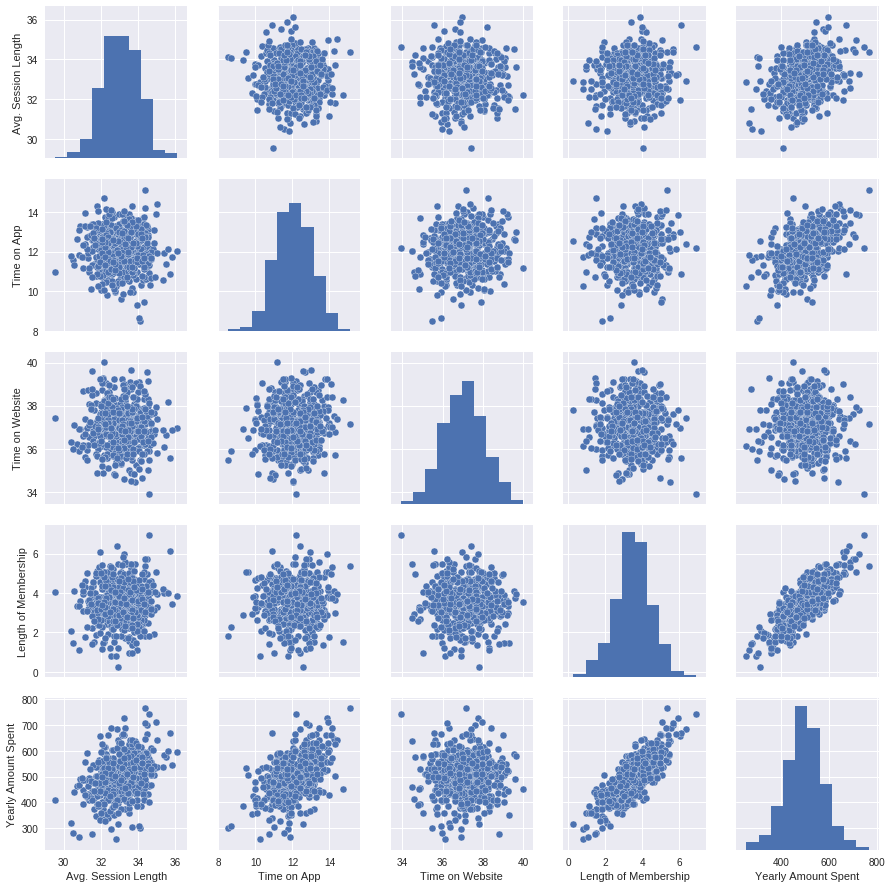

In [20]:
sns.pairplot(df)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**



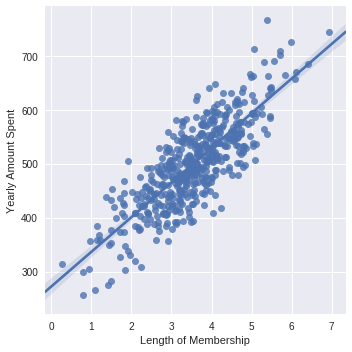

In [26]:
#length of membership is the most correlated feature with yearl amount spent.
# Create a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership.

sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)



# Training and Testing Data
**Now lets split the data into training and testing sets. Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.**

In [27]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [0]:
X=df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [0]:
Y=df['Yearly Amount Spent']

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

# Training the Model
Import LinearRegression from sklearn.linear_model

In [0]:
from sklearn.linear_model import LinearRegression

**Creating an instance of a LinearRegression() model named lm.**

In [0]:
lm = LinearRegression()

**Train/fit lm on the training data.**

In [39]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Print out the coefficients of the model**

In [41]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

# Predicting Test Data

Now that we have fit our model, let's evaluate its performance by predicting off the test values!

Use lm.predict() to predict off the X_test set of the data.

In [0]:
prediction=lm.predict(x_test)

In [45]:
prediction

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

**Create a scatterplot of the real test values versus the predicted values.**

Text(0,0.5,'Predicted Values')

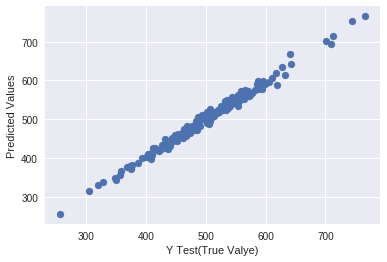

In [48]:
plt.scatter(y_test,prediction)
plt.xlabel('Y Test(True Valye)')
plt.ylabel('Predicted Values')

# Evaluating the Model
Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

**Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [0]:
from sklearn import metrics

In [56]:
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MsE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE:  7.2281486534308295
MsE:  79.8130516509743
RMSE:  8.933815066978626


In [58]:
metrics.explained_variance_score(y_test,prediction)

0.9890771231889607

# Residuals

**Ploting  a histogram of the residuals to make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**




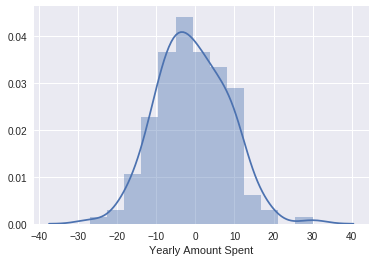

In [60]:
sns.distplot((y_test-prediction))


# Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important. Let's see if we can interpret the coefficients at all to get an idea.

**Recreate the dataframe below.**

In [0]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeffecient'])

In [62]:
cdf

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097



**How can you interpret these coefficients?**


In [0]:
# Holding all the units fixed, a unit increase in Avg. Session Length is associate with approx 26 dolar more expanse
# similarly for other.
